In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
from math import ceil, floor
import omnivida_loader as ov
%matplotlib inline

### Let's start by loading the cleansed datasets into pandas DataFrames. 

In [2]:
adherence, adherence_change = ov.get_adherence_dataset()
basic_info = ov.get_basic_info_dataset()
familiar_records = ov.get_family_records_dataset()
life_quality = ov.get_wellbeing_index_dataset()

### Basic personal data

In [3]:
basic_info.head()

,id_paciente,edad,genero,escolaridad,estado_civil,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
0,500547,58.0,M,SECUNDARIA,CASADO (A),ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19
1,500588,15.0,M,PRIMARIA,SOLTERO (A),SANTAFE DE BOGOTA D.C,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15


In [4]:
basic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 16 columns):
id_paciente             872 non-null int64
edad                    872 non-null float64
genero                  870 non-null category
escolaridad             862 non-null category
estado_civil            872 non-null category
departamento            872 non-null object
ciudad                  872 non-null object
estrato_social          872 non-null float64
zona                    872 non-null category
acompanante             850 non-null object
nivel_socioeconomico    860 non-null category
ocupacion               872 non-null category
regimen                 850 non-null category
tipo_afiliacion         850 non-null category
relacion_laboral        852 non-null category
fecha_nacimiento        872 non-null datetime64[ns]
dtypes: category(9), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 57.3+ KB


In [5]:
basic_info.describe(include='all')

,id_paciente,edad,genero,escolaridad,estado_civil,departamento,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,tipo_afiliacion,relacion_laboral,fecha_nacimiento
count,8.720000e+02,872.000000,870,862,872,872,872,872.000000,872,850,860,872,850,850,852,872
unique,NaN,NaN,2,8,6,11,52,NaN,2,10,6,8,4,3,5,858
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),ANTIOQUIA,MEDELLIN,NaN,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1984-05-28 00:00:00
freq,NaN,NaN,604,384,410,699,464,NaN,839,527,629,457,826,532,471,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-04-05 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-04 00:00:00
mean,1.259526e+06,41.146789,NaN,NaN,NaN,NaN,NaN,2.983945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.343817e+05,18.222354,NaN,NaN,NaN,NaN,NaN,0.865047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.887368e+05,27.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's define a new variable called `grupo_edad` (age group), to process age as a categorial variable:

In [6]:
basic_info['grupo_edad'] = basic_info['edad'].apply(lambda x: ceil(x/10.))

In [7]:
adherence.head()

,id,fe_entrevista,morisky_green,smaq1,smaq2,espa,nm_espa,cualitativo_ponderado,cuantitativo_ponderado,categoria
0,500547,2016-07-11,1,1,4,1,6.0,1,4,A
1,500547,2019-03-14,1,1,4,1,6.0,1,4,A
2,500547,2019-10-11,1,1,4,1,6.0,1,4,A
3,500547,2019-12-09,1,1,4,1,6.0,1,4,A
4,500547,2020-01-16,1,1,4,1,6.0,1,4,A


In [8]:
adherence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 10 columns):
id                        4773 non-null int64
fe_entrevista             4773 non-null datetime64[ns]
morisky_green             4773 non-null int64
smaq1                     4773 non-null int64
smaq2                     4773 non-null int64
espa                      4773 non-null int64
nm_espa                   4773 non-null float64
cualitativo_ponderado     4773 non-null int64
cuantitativo_ponderado    4773 non-null int64
categoria                 4773 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(7)
memory usage: 340.5 KB


In [9]:
adherence.describe(include='all')

,id,fe_entrevista,morisky_green,smaq1,smaq2,espa,nm_espa,cualitativo_ponderado,cuantitativo_ponderado,categoria
count,4.773000e+03,4773,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773
unique,NaN,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,2019-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,NaN,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2317
first,NaN,2012-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-05-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.238178e+06,NaN,0.848942,0.836162,3.774356,0.830086,5.602975,0.793002,3.774356,NaN
std,4.296392e+05,NaN,0.358143,0.370168,0.799201,0.375597,0.911489,0.405196,0.799201,NaN
min,5.005470e+05,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,8.716330e+05,NaN,1.000000,1.000000,4.000000,1.000000,5.000000,1.000000,4.000000,NaN


,id,count_records
0,1769865,41
1,979605,30
2,1132214,28
3,622031,27
4,1676414,26
5,1196034,25
6,916510,25
7,1536265,23
8,1828862,23
9,1399081,23


4773


Text(0.5,1,'Number of adherence records per patient')

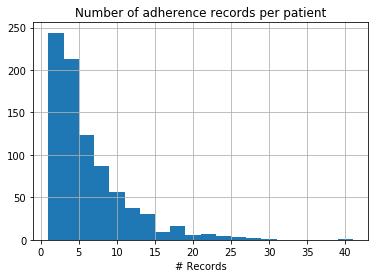

In [10]:
num_records_per_patient = adherence.groupby('id').size().sort_values(ascending=False).reset_index(name='count_records')
display(num_records_per_patient.head(10))
print(sum(num_records_per_patient['count_records']))
num_records_per_patient.hist('count_records', bins=20)
plt.xlabel('# Records')
plt.title('Number of adherence records per patient')

,categoria,count_records
0,A,2317
1,M,1285
2,A-,689
3,N+,472
4,N,10


4773


Text(0.5,1,'Number records per category')

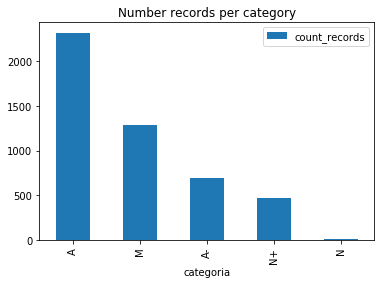

In [11]:
num_records_per_category = adherence.groupby('categoria').size().sort_values(ascending=False).reset_index(name='count_records')
display(num_records_per_category)
print(sum(num_records_per_category['count_records']))
num_records_per_category.plot(kind='bar', x='categoria')
# plt.xlabel('# Records')
plt.title('Number records per category')

In [12]:
adherence_pivot = adherence.copy()
adherence_pivot['mes_entrevista'] = adherence_pivot['fe_entrevista'].dt.month
adherence_pivot['anio_entrevista'] = adherence_pivot['fe_entrevista'].dt.year
adherence_pivot_cuantitativo = pd.pivot_table(adherence_pivot, values='cuantitativo_ponderado', index='mes_entrevista', columns='anio_entrevista', aggfunc='mean')
adherence_pivot_cualitativo = pd.pivot_table(adherence_pivot, values='cualitativo_ponderado', index='mes_entrevista', columns='anio_entrevista', aggfunc='sum')
adherence_pivot_enrevistas = pd.pivot_table(adherence_pivot, values='id', index='mes_entrevista', columns='anio_entrevista', aggfunc='count')

Text(0.5,1,'Reportes de adherencia')

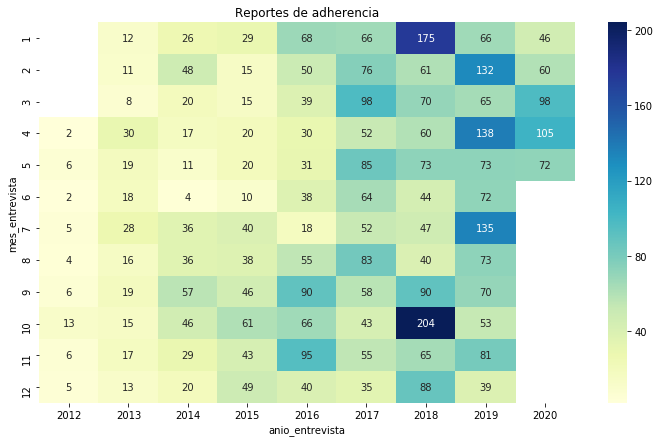

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(adherence_pivot_enrevistas, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Reportes de adherencia')

Text(0.5,1,'Number of adherent patients per month')

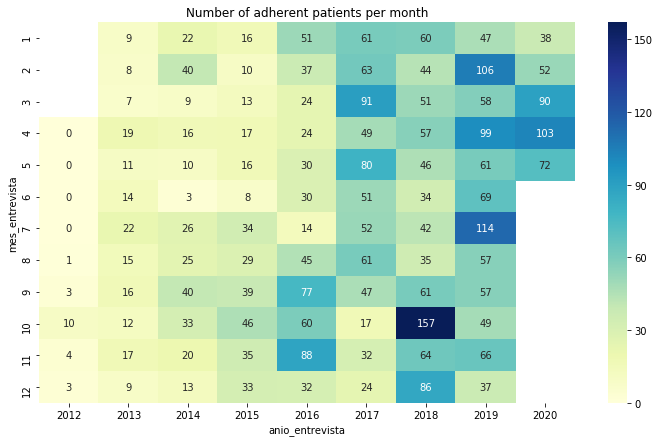

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(adherence_pivot_cualitativo, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Number of adherent patients per month')

Text(0.5,1,'Percentage of adherent patients per month')

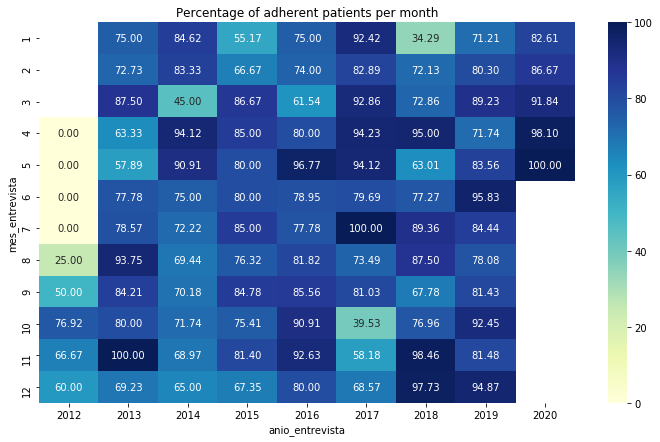

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(100*(adherence_pivot_cualitativo/adherence_pivot_enrevistas), ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_title('Percentage of adherent patients per month')

Text(0.5,1,'Average adherence score per month')

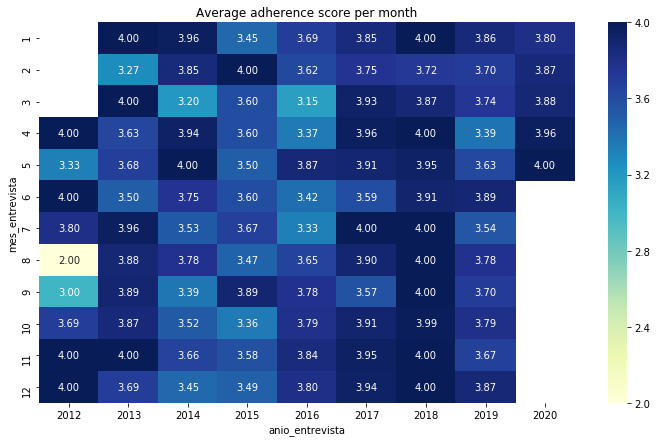

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(adherence_pivot_cuantitativo, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_title('Average adherence score per month')

Text(0.5,1,'Median adherence (qualitative) score per month')

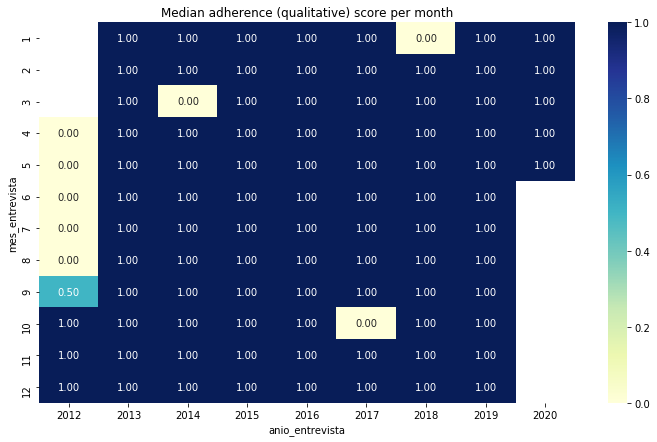

In [17]:
adherence_pivot_cualitativo2 = pd.pivot_table(adherence_pivot, values='cualitativo_ponderado', index='mes_entrevista', columns='anio_entrevista', aggfunc='median')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(adherence_pivot_cualitativo2, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_title('Median adherence (qualitative) score per month')

In [18]:
adherence_change.head(10)

,id,fe_entrevista,morisky_green,smaq1,smaq2,espa,nm_espa,cualitativo_ponderado,cuantitativo_ponderado,categoria,morisky_change,smaq1_change,smaq2_change,espa_change,nm_espa_change,cualitativo_ponderado_change,cuantitativo_ponderado_change,dias_ultimo_control,historico_porcentaje_adherencia
0,500547,2016-07-11,1,1,4,1,6.0,1,4,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
1,500547,2019-03-14,1,1,4,1,6.0,1,4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,976.0,100.0
2,500547,2019-10-11,1,1,4,1,6.0,1,4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0,100.0
3,500547,2019-12-09,1,1,4,1,6.0,1,4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,100.0
4,500547,2020-01-16,1,1,4,1,6.0,1,4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,100.0
5,500547,2020-03-25,1,1,4,1,6.0,1,4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,100.0
6,500547,2020-05-08,1,1,4,1,5.0,1,4,A,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,44.0,100.0
7,500588,2019-04-26,1,1,4,1,6.0,1,4,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
8,502989,2014-08-22,0,0,2,1,5.0,0,2,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,502989,2014-10-28,0,0,2,0,5.0,0,2,M,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,67.0,0.0


In [19]:
select_fields = ['id', 'fe_entrevista', 'cualitativo_ponderado', 'cuantitativo_ponderado', 'cualitativo_ponderado_change', 'cuantitativo_ponderado_change']
adherence_change_analysis = adherence_change[select_fields]
adherence_change_analysis.head(10)

,id,fe_entrevista,cualitativo_ponderado,cuantitativo_ponderado,cualitativo_ponderado_change,cuantitativo_ponderado_change
0,500547,2016-07-11,1,4,NaN,NaN
1,500547,2019-03-14,1,4,0.0,0.0
2,500547,2019-10-11,1,4,0.0,0.0
3,500547,2019-12-09,1,4,0.0,0.0
4,500547,2020-01-16,1,4,0.0,0.0
5,500547,2020-03-25,1,4,0.0,0.0
6,500547,2020-05-08,1,4,0.0,0.0
7,500588,2019-04-26,1,4,NaN,NaN
8,502989,2014-08-22,0,2,NaN,NaN
9,502989,2014-10-28,0,2,0.0,0.0


#### Let's have a look at those patients that went from `adherent` (i.e. 1 in the `cualitativo_ponderado` field) to `non-adherent` (i.e. 1 in the `cualitativo_ponderado` field) 

In [20]:
neg_transition = adherence_change_analysis[adherence_change_analysis['cualitativo_ponderado_change']==-1]
neg_transition.head(10)

,id,fe_entrevista,cualitativo_ponderado,cuantitativo_ponderado,cualitativo_ponderado_change,cuantitativo_ponderado_change
14,502989,2016-01-12,0,3,-1.0,-1.0
16,502989,2017-01-03,0,3,-1.0,-1.0
20,502989,2018-10-03,0,4,-1.0,0.0
35,506808,2018-10-08,0,4,-1.0,0.0
44,512938,2018-05-04,0,4,-1.0,0.0
48,512938,2019-09-30,0,1,-1.0,-3.0
51,514102,2018-01-30,0,4,-1.0,0.0
55,524006,2015-10-13,0,4,-1.0,0.0
62,524006,2017-05-10,0,3,-1.0,-1.0
93,529410,2018-01-30,0,4,-1.0,0.0


In [21]:
neg_transition_count = neg_transition.groupby('id').size().sort_values(ascending=False).reset_index(name='count_neg_transitions')
neg_transition_count.head(10)

,id,count_neg_transitions
0,1769865,7
1,832593,7
2,622031,6
3,739693,6
4,673765,6
5,916510,6
6,1828862,5
7,1132214,5
8,747471,5
9,801004,5


Text(0.5,1,'Number of negative transitions per month')

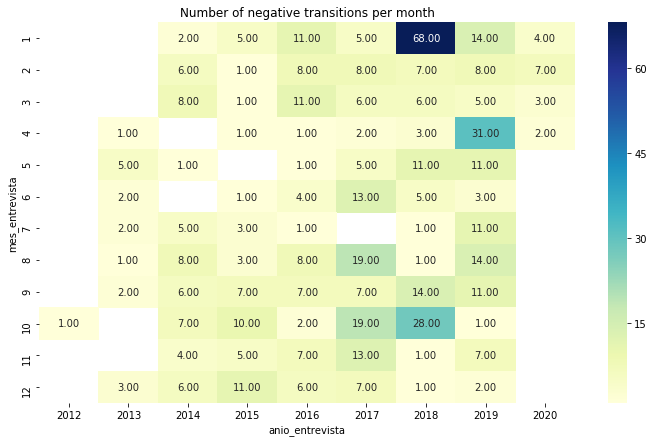

In [22]:
neg_transition_pivot = neg_transition.copy()
neg_transition_pivot['mes_entrevista'] = neg_transition_pivot['fe_entrevista'].dt.month
neg_transition_pivot['anio_entrevista'] = neg_transition_pivot['fe_entrevista'].dt.year
neg_transition_pivot = pd.pivot_table(neg_transition_pivot, values='id', index='mes_entrevista', columns='anio_entrevista', aggfunc='count')

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(neg_transition_pivot, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_title('Number of negative transitions per month')

#### Let's have a look at those patients that went from `non-adherent` (i.e. 0 in the `cualitativo_ponderado` field) to `adherent` (i.e. 1 in the `cualitativo_ponderado` field) 

In [23]:
pos_transition = adherence_change_analysis[adherence_change_analysis['cualitativo_ponderado_change']==1]
pos_transition.head(10)

,id,fe_entrevista,cualitativo_ponderado,cuantitativo_ponderado,cualitativo_ponderado_change,cuantitativo_ponderado_change
13,502989,2015-06-25,1,4,1.0,1.0
15,502989,2016-01-15,1,4,1.0,1.0
17,502989,2017-03-21,1,4,1.0,1.0
21,502989,2019-02-08,1,4,1.0,0.0
23,506808,2013-05-24,1,4,1.0,0.0
37,506808,2019-06-14,1,4,1.0,4.0
46,512938,2018-11-14,1,4,1.0,0.0
52,514102,2018-09-25,1,4,1.0,0.0
57,524006,2016-06-02,1,4,1.0,0.0
63,524006,2017-07-28,1,4,1.0,1.0


In [24]:
pos_transition_count = pos_transition.groupby('id').size().sort_values(ascending=False).reset_index(name='count_pos_transitions')
pos_transition_count.head(10)

,id,count_pos_transitions
0,1769865,8
1,832593,7
2,622031,7
3,673765,6
4,739693,6
5,1132214,6
6,747471,5
7,1399081,5
8,916510,5
9,801004,5


Text(0.5,1,'Number of positive transitions per month')

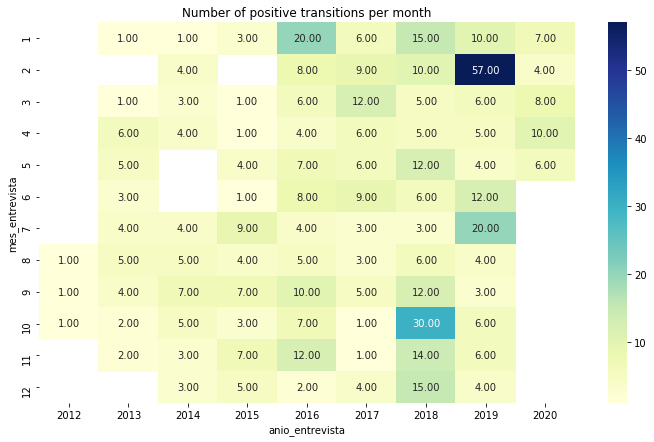

In [25]:
pos_transition_pivot = pos_transition.copy()
pos_transition_pivot['mes_entrevista'] = pos_transition_pivot['fe_entrevista'].dt.month
pos_transition_pivot['anio_entrevista'] = pos_transition_pivot['fe_entrevista'].dt.year
pos_transition_pivot = pd.pivot_table(pos_transition_pivot, values='id', index='mes_entrevista', columns='anio_entrevista', aggfunc='count')

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(pos_transition_pivot, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_title('Number of positive transitions per month')

#### Let's get the last reported adherence status for each of the users in the available dataset

In [27]:
updated_reported_adherence = pd.DataFrame()
for paciente, df in adherence_change.groupby('id'):
    temp_df = df.copy()
    row = {}
    row['id_paciente'] = int(paciente)
    row['fecha_primer_reporte'] = temp_df.iloc[0]['fe_entrevista']
    row['fecha_ultimo_reporte'] = temp_df.iloc[-1]['fe_entrevista']
    row['num_reportes'] = temp_df.shape[0]
    row['cualitativo_ponderado'] = temp_df.iloc[-1]['cualitativo_ponderado']
    row['cuantitativo_ponderado'] = temp_df.iloc[-1]['cuantitativo_ponderado']
    row['categoria'] = temp_df.iloc[0]['categoria']
    row['porcentaje_adherente'] = temp_df.iloc[-1]['historico_porcentaje_adherencia']
    updated_reported_adherence = updated_reported_adherence.append(row, ignore_index=True)

# Rearrange columns
updated_reported_adherence = updated_reported_adherence[
    ['id_paciente', 'fecha_primer_reporte', 'fecha_ultimo_reporte', 
     'num_reportes', 'cualitativo_ponderado', 'cuantitativo_ponderado', 'categoria', 'porcentaje_adherente']
]

display(updated_reported_adherence.head(10))
updated_reported_adherence.shape

,id_paciente,fecha_primer_reporte,fecha_ultimo_reporte,num_reportes,cualitativo_ponderado,cuantitativo_ponderado,categoria,porcentaje_adherente
0,500547.0,2016-07-11,2020-05-08,7.0,1.0,4.0,A,100.00
1,500588.0,2019-04-26,2019-04-26,1.0,1.0,4.0,A,100.00
2,502989.0,2014-08-22,2019-02-08,14.0,1.0,4.0,M,42.86
3,506808.0,2013-05-08,2019-06-14,16.0,1.0,4.0,M,81.25
4,512938.0,2015-02-24,2019-09-30,11.0,0.0,1.0,M,72.73
5,514102.0,2013-08-06,2018-09-25,4.0,1.0,4.0,A,75.00
6,524006.0,2015-01-05,2019-05-28,14.0,1.0,4.0,A-,78.57
7,524902.0,2018-04-24,2018-04-24,1.0,1.0,4.0,A,100.00
8,525295.0,2018-12-29,2019-06-20,2.0,1.0,4.0,A,100.00
9,525540.0,2019-12-09,2019-12-09,1.0,1.0,4.0,A,100.00


(840, 8)

In [28]:
updated_reported_adherence = updated_reported_adherence.merge(pos_transition_count, how='left', left_on='id_paciente', right_on='id').drop(['id'], axis=1)
updated_reported_adherence.head(10)

,id_paciente,fecha_primer_reporte,fecha_ultimo_reporte,num_reportes,cualitativo_ponderado,cuantitativo_ponderado,categoria,porcentaje_adherente,count_pos_transitions
0,500547.0,2016-07-11,2020-05-08,7.0,1.0,4.0,A,100.00,NaN
1,500588.0,2019-04-26,2019-04-26,1.0,1.0,4.0,A,100.00,NaN
2,502989.0,2014-08-22,2019-02-08,14.0,1.0,4.0,M,42.86,4.0
3,506808.0,2013-05-08,2019-06-14,16.0,1.0,4.0,M,81.25,2.0
4,512938.0,2015-02-24,2019-09-30,11.0,0.0,1.0,M,72.73,1.0
5,514102.0,2013-08-06,2018-09-25,4.0,1.0,4.0,A,75.00,1.0
6,524006.0,2015-01-05,2019-05-28,14.0,1.0,4.0,A-,78.57,2.0
7,524902.0,2018-04-24,2018-04-24,1.0,1.0,4.0,A,100.00,NaN
8,525295.0,2018-12-29,2019-06-20,2.0,1.0,4.0,A,100.00,NaN
9,525540.0,2019-12-09,2019-12-09,1.0,1.0,4.0,A,100.00,NaN


In [29]:
updated_reported_adherence = updated_reported_adherence.merge(neg_transition_count, how='left', left_on='id_paciente', right_on='id').drop(['id'], axis=1)

In [30]:
updated_reported_adherence.head(20)

,id_paciente,fecha_primer_reporte,fecha_ultimo_reporte,num_reportes,cualitativo_ponderado,cuantitativo_ponderado,categoria,porcentaje_adherente,count_pos_transitions,count_neg_transitions
0,500547.0,2016-07-11,2020-05-08,7.0,1.0,4.0,A,100.00,NaN,NaN
1,500588.0,2019-04-26,2019-04-26,1.0,1.0,4.0,A,100.00,NaN,NaN
2,502989.0,2014-08-22,2019-02-08,14.0,1.0,4.0,M,42.86,4.0,3.0
3,506808.0,2013-05-08,2019-06-14,16.0,1.0,4.0,M,81.25,2.0,1.0
4,512938.0,2015-02-24,2019-09-30,11.0,0.0,1.0,M,72.73,1.0,2.0
5,514102.0,2013-08-06,2018-09-25,4.0,1.0,4.0,A,75.00,1.0,1.0
6,524006.0,2015-01-05,2019-05-28,14.0,1.0,4.0,A-,78.57,2.0,2.0
7,524902.0,2018-04-24,2018-04-24,1.0,1.0,4.0,A,100.00,NaN,NaN
8,525295.0,2018-12-29,2019-06-20,2.0,1.0,4.0,A,100.00,NaN,NaN
9,525540.0,2019-12-09,2019-12-09,1.0,1.0,4.0,A,100.00,NaN,NaN


#### Let's study the influence of some demographic factors on the adherence (age, education, gender, socioeconomic status, zone, employment type)

In [31]:
basic_info_adherence = updated_reported_adherence.merge(basic_info.loc[:, ~basic_info.columns.isin(['tipo_afiliacion', 'fecha_nacimiento'])])
basic_info_adherence['categoria'] = basic_info_adherence['categoria'].astype('category')
basic_info_adherence['categoria'].cat.reorder_categories(['N', 'N+', 'M', 'A-', 'A'], ordered=True, inplace=True)

In [32]:
basic_info_adherence['periodo_medio_seguimiento'] = ((basic_info_adherence['fecha_ultimo_reporte'] - basic_info_adherence['fecha_primer_reporte']) / basic_info_adherence['num_reportes']) / np.timedelta64(1, 'Y')

In [33]:
basic_info_adherence.head()

,id_paciente,fecha_primer_reporte,fecha_ultimo_reporte,num_reportes,cualitativo_ponderado,cuantitativo_ponderado,categoria,porcentaje_adherente,count_pos_transitions,count_neg_transitions,...,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,relacion_laboral,grupo_edad,periodo_medio_seguimiento
0,500547.0,2016-07-11,2020-05-08,7.0,1.0,4.0,A,100.00,NaN,NaN,...,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,6,0.546408
1,500588.0,2019-04-26,2019-04-26,1.0,1.0,4.0,A,100.00,NaN,NaN,...,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,0.000000
2,502989.0,2014-08-22,2019-02-08,14.0,1.0,4.0,M,42.86,4.0,3.0,...,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,SIN EMPLEO,3,0.318966
3,506808.0,2013-05-08,2019-06-14,16.0,1.0,4.0,M,81.25,2.0,1.0,...,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,0.381254
4,512938.0,2015-02-24,2019-09-30,11.0,0.0,1.0,M,72.73,1.0,2.0,...,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,3,0.417904


1. Adherence vs. Age

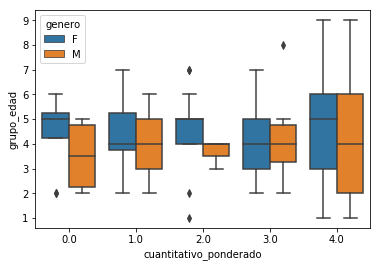

In [34]:
sns.boxplot(data=basic_info_adherence, x='cuantitativo_ponderado', y='grupo_edad', hue='genero')

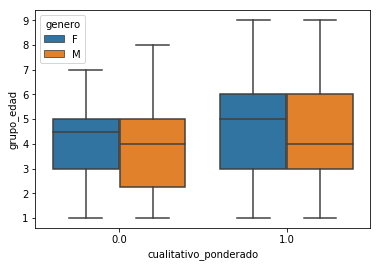

In [35]:
sns.boxplot(data=basic_info_adherence, x='cualitativo_ponderado', y='grupo_edad', hue='genero')

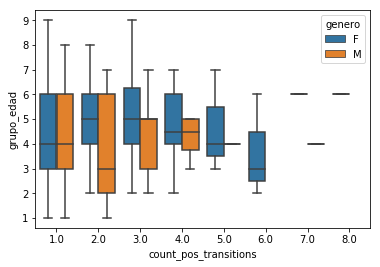

In [36]:
sns.boxplot(data=basic_info_adherence, x='count_pos_transitions', y='grupo_edad', hue='genero')

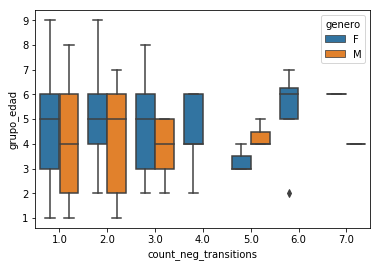

In [37]:
sns.boxplot(data=basic_info_adherence, x='count_neg_transitions', y='grupo_edad', hue='genero')

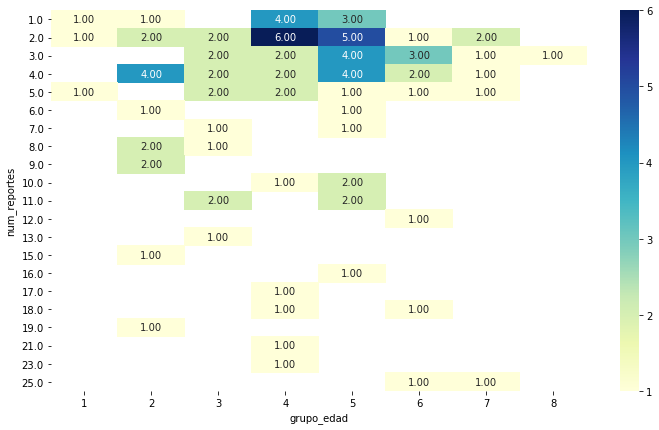

In [38]:
fig, ax = plt.subplots(figsize=(12,7))
num_reports_age_group = pd.pivot_table(basic_info_adherence[basic_info_adherence['cualitativo_ponderado']==0],
                                           values='id_paciente', index='num_reportes', 
                                           columns='grupo_edad', aggfunc='count')
sns.heatmap(num_reports_age_group, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")

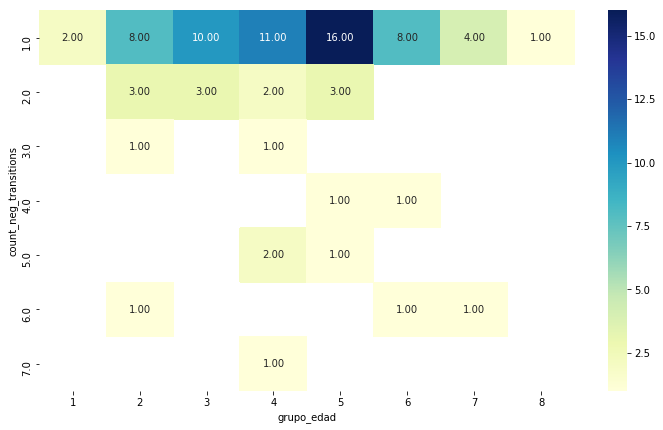

In [39]:
fig, ax = plt.subplots(figsize=(12,7))
neg_transitions_age_group = pd.pivot_table(basic_info_adherence[basic_info_adherence['cualitativo_ponderado']==0],
                                           values='id_paciente', index='count_neg_transitions', 
                                           columns='grupo_edad', aggfunc='count')
sns.heatmap(neg_transitions_age_group, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")

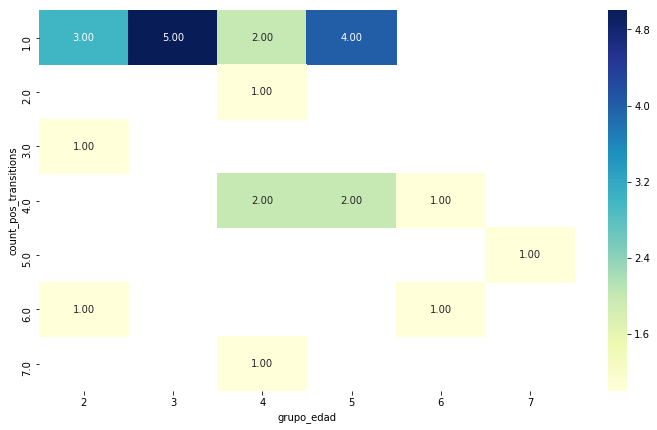

In [40]:
fig, ax = plt.subplots(figsize=(12,7))
pos_transitions_age_group = pd.pivot_table(basic_info_adherence[basic_info_adherence['cualitativo_ponderado']==0],
                                           values='id_paciente', index='count_pos_transitions', 
                                           columns='grupo_edad', aggfunc='count')
sns.heatmap(pos_transitions_age_group, ax=ax, annot=True, fmt=".2f", cmap="YlGnBu")

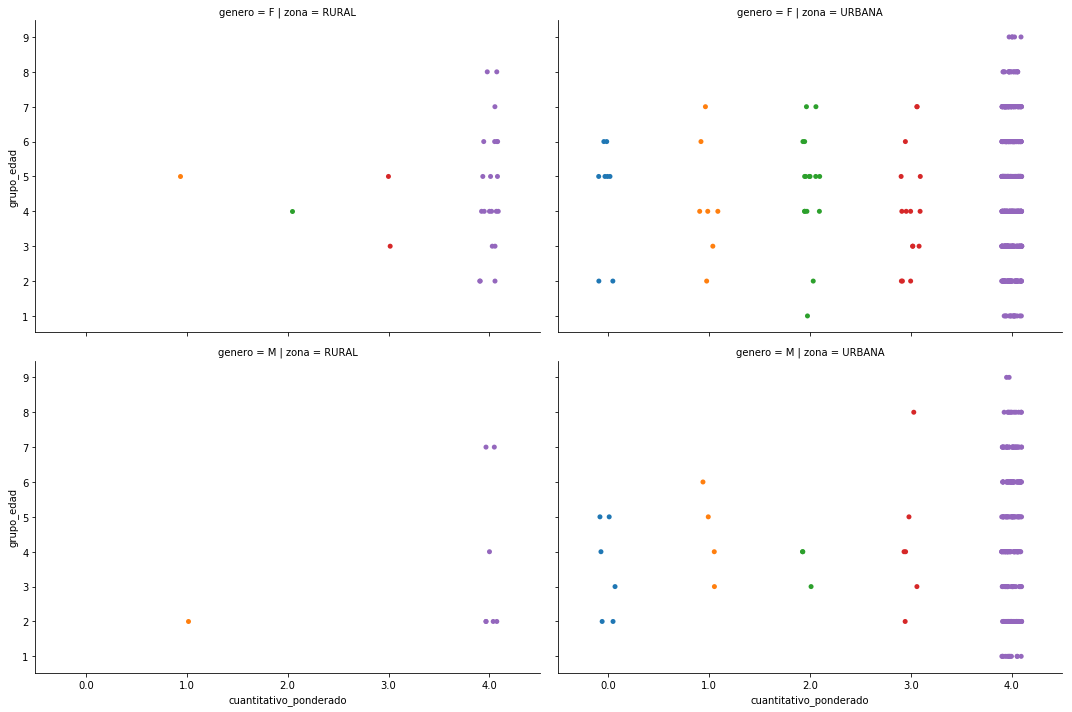

In [41]:
sns.catplot(data=basic_info_adherence, y="grupo_edad", x="cuantitativo_ponderado", col='zona', row='genero',
            height=5, aspect=1.5)

Text(0.5,1,'Age vs Adherence category')

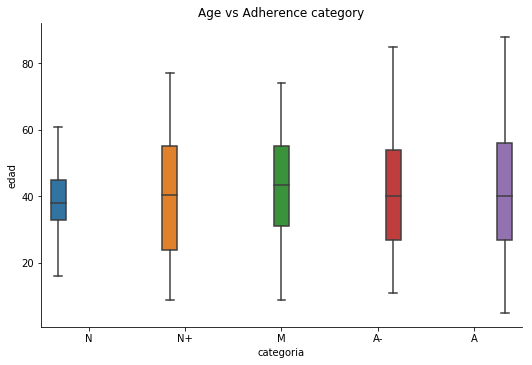

In [42]:
sns.catplot(data=basic_info_adherence, y="edad", x="categoria", hue="categoria",#, col='zona', row='genero',
            kind='box', height=5, aspect=1.5)
plt.title("Age vs Adherence category")

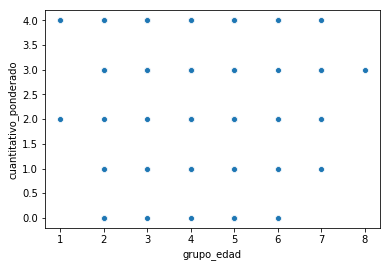

In [43]:
sns.scatterplot(x='grupo_edad', y='cuantitativo_ponderado', data=basic_info_adherence[basic_info_adherence['cualitativo_ponderado']==0])

In [44]:
basic_info_non_adherent_patients = basic_info_adherence[(basic_info_adherence['cuantitativo_ponderado'] < 4) & (basic_info_adherence['cualitativo_ponderado']==0)]
basic_info_non_adherent_patients

,id_paciente,fecha_primer_reporte,fecha_ultimo_reporte,num_reportes,cualitativo_ponderado,cuantitativo_ponderado,categoria,porcentaje_adherente,count_pos_transitions,count_neg_transitions,...,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,relacion_laboral,grupo_edad,periodo_medio_seguimiento
4,512938.0,2015-02-24,2019-09-30,11.0,0.0,1.0,M,72.73,1.0,2.0,...,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,3,0.417904
13,529410.0,2012-04-19,2019-02-14,7.0,0.0,3.0,A-,57.14,1.0,1.0,...,BOGOTA,3.0,RURAL,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,3,0.974695
15,530244.0,2018-10-16,2019-02-21,2.0,0.0,3.0,M,50.00,NaN,1.0,...,BOGOTA,2.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,5,0.175226
18,537607.0,2019-04-27,2019-09-02,5.0,0.0,3.0,A-,80.00,NaN,1.0,...,ITAGUI,3.0,URBANA,PACIENTE,A,AMA DE CASA,CONTRIBUTIVO,SIN EMPLEO,7,0.070090
36,566408.0,2018-04-04,2019-08-30,2.0,0.0,3.0,M,50.00,NaN,1.0,...,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,4,0.702273
37,567706.0,2015-06-05,2019-04-30,7.0,0.0,2.0,M,71.43,1.0,2.0,...,MEDELLIN,5.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,5,0.557360
62,614273.0,2016-01-20,2019-09-23,10.0,0.0,3.0,A-,90.00,NaN,1.0,...,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,5,0.367427
65,617991.0,2017-02-28,2020-02-18,6.0,0.0,0.0,M,66.67,1.0,2.0,...,MEDELLIN,3.0,URBANA,MADRE,C,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,0.495105
92,673765.0,2013-07-25,2020-04-06,19.0,0.0,0.0,M,47.37,6.0,6.0,...,GIRARDOTA,4.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,0.352614
102,686768.0,2014-06-11,2019-02-21,11.0,0.0,3.0,A-,63.64,1.0,1.0,...,COPACABANA,3.0,URBANA,PACIENTE,B,EMPLEADO,CONTRIBUTIVO,EMPLEADO,3,0.427113


In [45]:
basic_info_adherent_patients = basic_info_adherence[(basic_info_adherence['cuantitativo_ponderado'] == 4) & (basic_info_adherence['cualitativo_ponderado']==1)]
basic_info_adherent_patients

,id_paciente,fecha_primer_reporte,fecha_ultimo_reporte,num_reportes,cualitativo_ponderado,cuantitativo_ponderado,categoria,porcentaje_adherente,count_pos_transitions,count_neg_transitions,...,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,relacion_laboral,grupo_edad,periodo_medio_seguimiento
0,500547.0,2016-07-11,2020-05-08,7.0,1.0,4.0,A,100.00,NaN,NaN,...,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,6,0.546408
1,500588.0,2019-04-26,2019-04-26,1.0,1.0,4.0,A,100.00,NaN,NaN,...,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,0.000000
2,502989.0,2014-08-22,2019-02-08,14.0,1.0,4.0,M,42.86,4.0,3.0,...,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,SIN EMPLEO,3,0.318966
3,506808.0,2013-05-08,2019-06-14,16.0,1.0,4.0,M,81.25,2.0,1.0,...,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,0.381254
5,514102.0,2013-08-06,2018-09-25,4.0,1.0,4.0,A,75.00,1.0,1.0,...,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,1.284078
6,524006.0,2015-01-05,2019-05-28,14.0,1.0,4.0,A-,78.57,2.0,2.0,...,MEDELLIN,3.0,URBANA,HIJO(A),A,PENSIONADO,CONTRIBUTIVO,PENSIONADO,7,0.313686
7,524902.0,2018-04-24,2018-04-24,1.0,1.0,4.0,A,100.00,NaN,NaN,...,MEDELLIN,2.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,6,0.000000
8,525295.0,2018-12-29,2019-06-20,2.0,1.0,4.0,A,100.00,NaN,NaN,...,CALI,3.0,URBANA,MADRE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,6,0.236829
9,525540.0,2019-12-09,2019-12-09,1.0,1.0,4.0,A,100.00,NaN,NaN,...,PEREIRA,3.0,URBANA,PACIENTE,A,SIN DEFINIR,CONTRIBUTIVO,SIN EMPLEO,6,0.000000
10,526049.0,2014-08-08,2020-03-19,6.0,1.0,4.0,A,100.00,NaN,NaN,...,MEDELLIN,3.0,URBANA,PACIENTE,B,EMPLEADO,CONTRIBUTIVO,EMPLEADO,6,0.935452


In [46]:
adherence[adherence['id']==1012279]

,id,fe_entrevista,morisky_green,smaq1,smaq2,espa,nm_espa,cualitativo_ponderado,cuantitativo_ponderado,categoria
1666,1012279,2018-07-27,1,1,4,1,6.0,1,4,M
1667,1012279,2019-06-11,0,0,3,1,5.0,0,3,M
1668,1012279,2019-07-16,1,1,4,1,6.0,1,4,M
1669,1012279,2020-02-22,1,1,4,0,5.0,0,4,M


In [47]:
corr_basic_info_adherence = basic_info_adherence.loc[:, ~basic_info_adherence.columns.isin(['id_paciente', 'edad'])].corr()

Text(0.5,1,'Correlation Matrix')

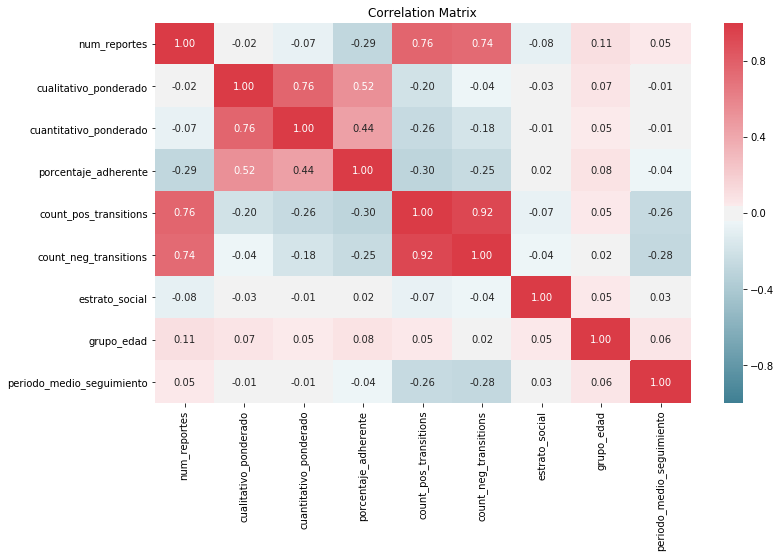

In [48]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr_basic_info_adherence, annot=True, fmt=".2f", ax=ax, center=0, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix")

In [49]:
corr_basic_info_non_adherent = basic_info_non_adherent_patients.loc[:, ~basic_info_non_adherent_patients.columns.isin(['id_paciente', 'edad'])].corr()

Text(0.5,1,'Correlation Matrix')

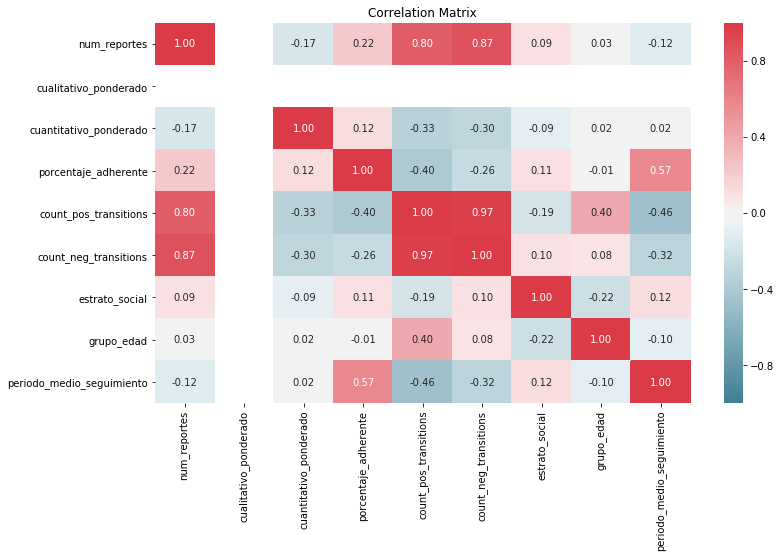

In [50]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr_basic_info_non_adherent, annot=True, fmt=".2f", ax=ax, center=0, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix")

In [51]:
corr_basic_info_adherent_patients = basic_info_adherent_patients.loc[:, ~basic_info_adherent_patients.columns.isin(['id_paciente', 'edad'])].corr()

Text(0.5,1,'Correlation Matrix')

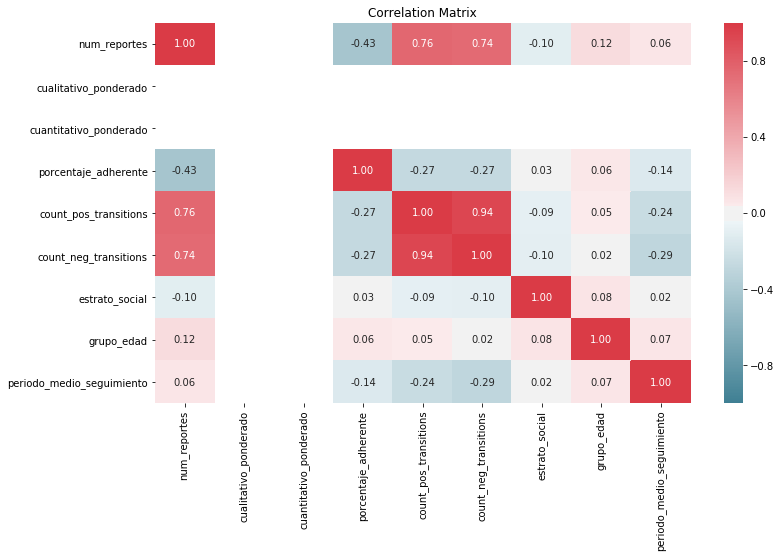

In [52]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr_basic_info_adherent_patients, annot=True, fmt=".2f", ax=ax, center=0, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix")

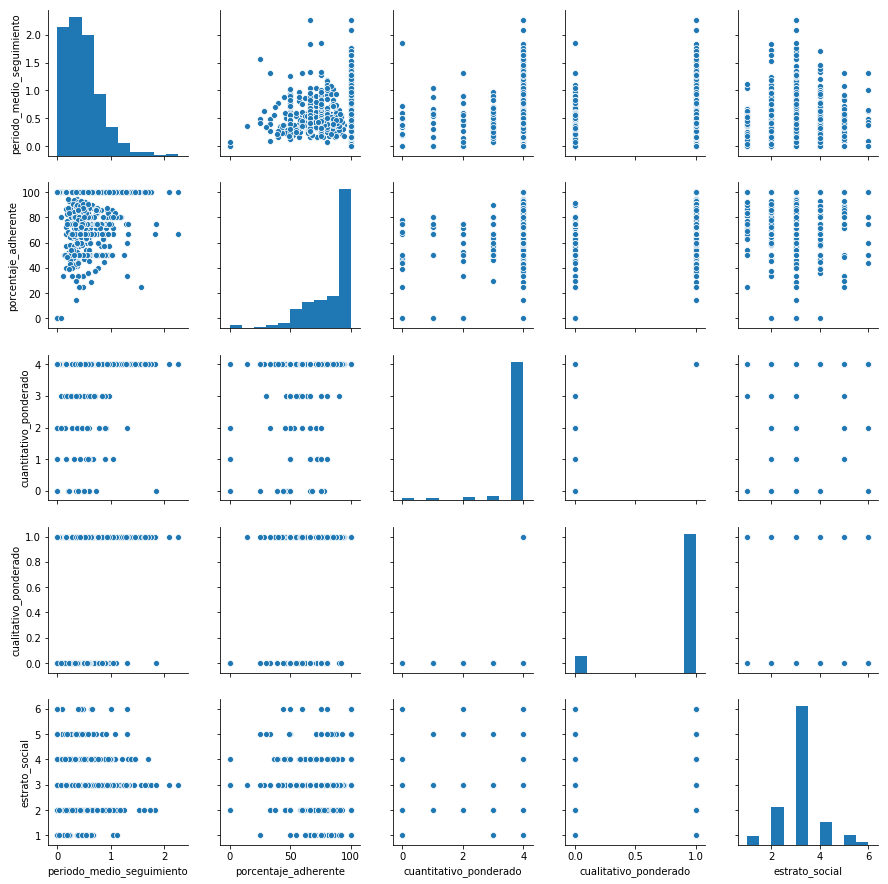

In [53]:
select_vars=['periodo_medio_seguimiento', 'porcentaje_adherente', 'cuantitativo_ponderado', 'cualitativo_ponderado', 'estrato_social']
sns.pairplot(basic_info_adherence, vars=select_vars)

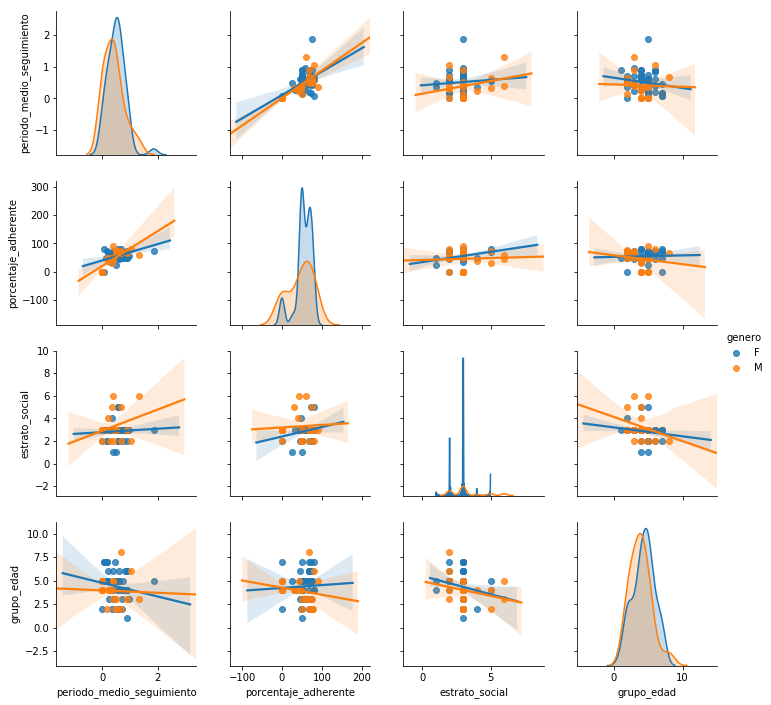

In [54]:
select_vars=['periodo_medio_seguimiento', 'porcentaje_adherente', 'estrato_social', 'grupo_edad']
sns.pairplot(basic_info_non_adherent_patients, vars=select_vars, kind='reg', hue='genero')

In [55]:
print(basic_info_adherent_patients.shape)
print(basic_info_non_adherent_patients.shape)


(748, 25)
(70, 25)


In [56]:
balanced_sample = pd.concat([basic_info_adherent_patients.sample(basic_info_non_adherent_patients.shape[0]), basic_info_non_adherent_patients], ignore_index=True)

In [57]:
display(balanced_sample.head(10))
balanced_sample.shape

,id_paciente,fecha_primer_reporte,fecha_ultimo_reporte,num_reportes,cualitativo_ponderado,cuantitativo_ponderado,categoria,porcentaje_adherente,count_pos_transitions,count_neg_transitions,...,ciudad,estrato_social,zona,acompanante,nivel_socioeconomico,ocupacion,regimen,relacion_laboral,grupo_edad,periodo_medio_seguimiento
0,1793212.0,2015-10-26,2019-02-07,4.0,1.0,4.0,A,75.00,1.0,1.0,...,MEDELLIN,3.0,URBANA,PACIENTE,A,JUBILADO,CONTRIBUTIVO,SIN EMPLEO,7,0.821372
1,1126622.0,2017-04-11,2020-05-20,6.0,1.0,4.0,A-,83.33,1.0,1.0,...,MEDELLIN,2.0,URBANA,PACIENTE,A,INDEPENDIENTE,SUBSIDIADO,INDEPENDIENTE,6,0.517921
2,894055.0,2017-09-30,2020-05-06,4.0,1.0,4.0,N+,75.00,1.0,1.0,...,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,3,0.649568
3,1376209.0,2018-08-03,2019-10-29,3.0,1.0,4.0,M,66.67,1.0,1.0,...,MANIZALES,4.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,EMPLEADO,4,0.412511
4,1538712.0,2016-12-22,2018-11-28,5.0,1.0,4.0,A,100.00,NaN,NaN,...,MEDELLIN,3.0,URBANA,PADRE,A,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,1,0.386592
5,1177987.0,2018-06-06,2018-08-29,2.0,1.0,4.0,A,100.00,NaN,NaN,...,MEDELLIN,4.0,URBANA,PACIENTE,B,EMPLEADO,CONTRIBUTIVO,EMPLEADO,5,0.114992
6,748597.0,2016-10-27,2019-11-25,11.0,1.0,4.0,A,63.64,1.0,1.0,...,MEDELLIN,3.0,URBANA,PADRE,B,ESTUDIANTE,CONTRIBUTIVO,MENOR NO LABORA,2,0.279764
7,737722.0,2015-04-13,2018-10-22,8.0,1.0,4.0,A,100.00,NaN,NaN,...,SABANETA,4.0,URBANA,PACIENTE,B,EMPLEADO,CONTRIBUTIVO,EMPLEADO,4,0.440803
8,1398029.0,2017-07-24,2018-10-18,3.0,1.0,4.0,A,100.00,NaN,NaN,...,CALI,2.0,URBANA,HIJO(A),A,AMA DE CASA,PARTICULAR,SIN EMPLEO,8,0.411599
9,1339118.0,2016-04-01,2018-03-23,2.0,1.0,4.0,A,100.00,NaN,NaN,...,BOGOTA,3.0,URBANA,HIJO(A),A,PENSIONADO,CONTRIBUTIVO,PENSIONADO,9,0.987015


(140, 25)

In [58]:
corr_balanced_sample = balanced_sample.loc[:, ~balanced_sample.columns.isin(['id_paciente', 'edad'])].corr()

Text(0.5,1,'Correlation Matrix')

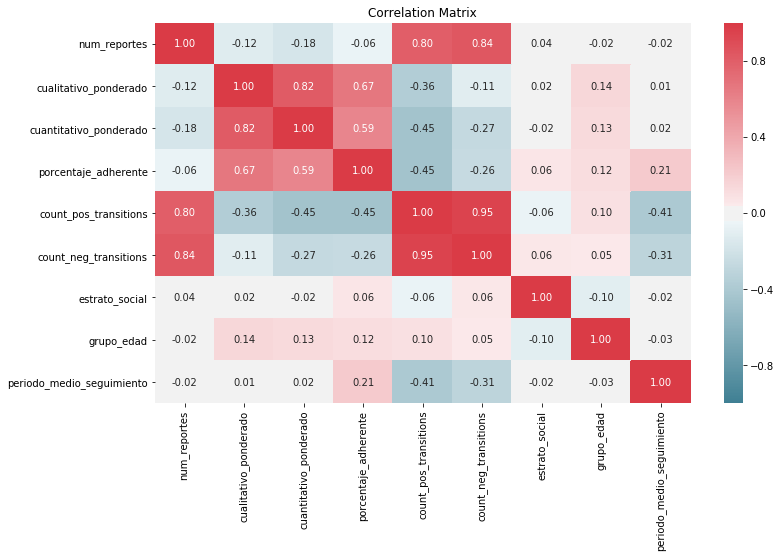

In [59]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr_balanced_sample, annot=True, fmt=".2f", ax=ax, center=0, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0)
plt.title("Correlation Matrix")

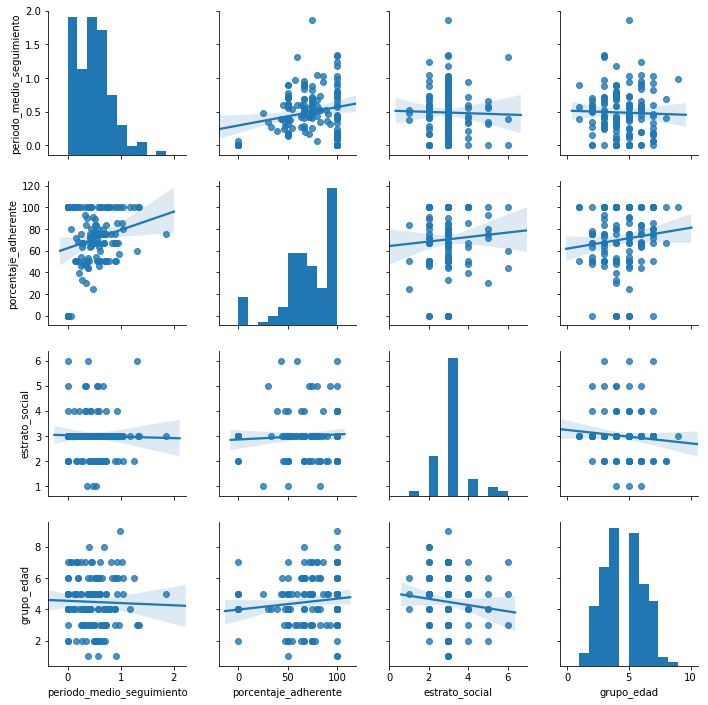

In [60]:
select_vars=['periodo_medio_seguimiento', 'porcentaje_adherente', 'estrato_social', 'grupo_edad']
sns.pairplot(balanced_sample, vars=select_vars, kind='reg')